# Compare Monthly & Daily results

#### Date: 1 March 2024

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

# Setup

#### required packages

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### start a local Dask client

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43937,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:36645,Total threads: 4
Dashboard: /proxy/36189/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:33549,


#### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
daily_path = '/g/data/es60/users/thomas_moore/clim_demo_results/daily/'
monthly_path = '/g/data/es60/users/thomas_moore/clim_demo_results/monthly/'

# load and use these NetCDF files

In [5]:
dSTATS = xr.open_mfdataset(daily_path+'BRAN2020_daily_temperature_stats.nc',parallel=True,chunks = {'st_ocean':51, 'yt_ocean':1500, 'xt_ocean':360})
dCLIM = xr.open_mfdataset(daily_path+'BRAN2020_daily_temperature_climatology.nc',parallel=True,chunks = {'month':1,'st_ocean':10, 'yt_ocean':1500, 'xt_ocean':3600})
dQUANT = xr.open_mfdataset(daily_path+'BRAN2020_daily_temperature_quant.nc',parallel=True,chunks = {'quantile':2,'st_ocean':1, 'yt_ocean':1500, 'xt_ocean':3600})

In [6]:
mSTATS = xr.open_mfdataset(monthly_path+'BRAN2020_temperature_stats.nc',parallel=True,chunks = {'st_ocean':51, 'yt_ocean':1500, 'xt_ocean':360})
mCLIM = xr.open_mfdataset(monthly_path+'BRAN2020_temperature_climatology.nc',parallel=True,chunks = {'month':1,'st_ocean':10, 'yt_ocean':1500, 'xt_ocean':3600})
mQUANT = xr.open_mfdataset(monthly_path+'BRAN2020_temperature_quant.nc',parallel=True,chunks = {'quantile':2,'st_ocean':1, 'yt_ocean':1500, 'xt_ocean':3600})

In [7]:
diffSTATS = mSTATS - dSTATS
diffCLIM = mCLIM - dCLIM
diffQUANT = mQUANT - dQUANT

In [8]:
diffQUANT

<xarray.Dataset> Size: 13GB
Dimensions:                (st_ocean: 51, xt_ocean: 3600, yt_ocean: 1500,
                            quantile: 2)
Coordinates:
  * st_ocean               (st_ocean) float64 408B 2.5 7.5 ... 4.509e+03
  * xt_ocean               (xt_ocean) float64 29kB 0.05 0.15 ... 359.9 360.0
  * yt_ocean               (yt_ocean) float64 12kB -74.95 -74.85 ... 74.85 74.95
  * quantile               (quantile) float64 16B 0.05 0.95
Data variables:
    quantile_temp          (quantile, st_ocean, yt_ocean, xt_ocean) float64 4GB dask.array<chunksize=(2, 1, 1500, 3600), meta=np.ndarray>
    El_Nino_quantile_temp  (quantile, st_ocean, yt_ocean, xt_ocean) float64 4GB dask.array<chunksize=(2, 1, 1500, 3600), meta=np.ndarray>
    La_Nina_quantile_temp  (quantile, st_ocean, yt_ocean, xt_ocean) float64 4GB dask.array<chunksize=(2, 1, 1500, 3600), meta=np.ndarray>

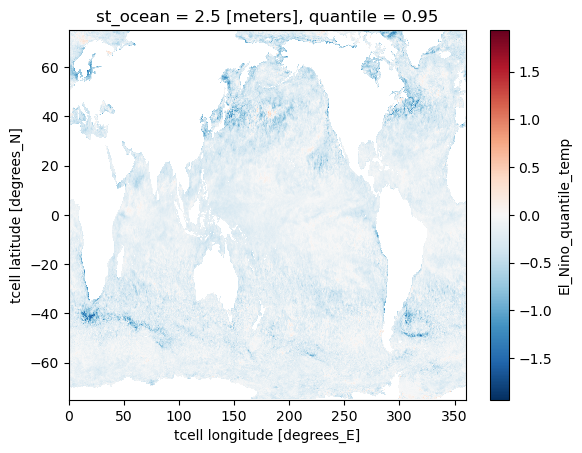

In [9]:
diffQUANT.El_Nino_quantile_temp.isel(st_ocean = 0).isel(quantile=1).plot()

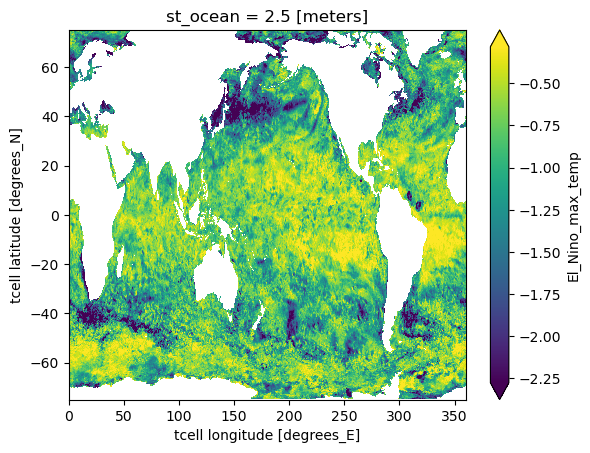

In [11]:
diffSTATS.El_Nino_max_temp.isel(st_ocean = 0).plot(robust=True)

/g/data/es60/users/thomas_moore/miniconda3/envs/pangeo_regionmask/lib/python3.12/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/es60/users/thomas_moore/miniconda3/envs/pangeo_regionmask/lib/python3.12/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


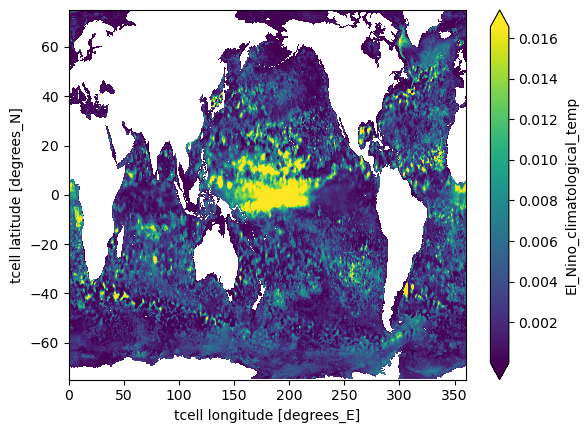

In [13]:
diffCLIM.El_Nino_climatological_temp.max(['st_ocean','month']).plot(robust=True)

## evaluate the daily output

In [50]:
dSTATS

<xarray.Dataset> Size: 17GB
Dimensions:              (st_ocean: 51, yt_ocean: 1500, xt_ocean: 3600)
Coordinates:
  * st_ocean             (st_ocean) float64 408B 2.5 7.5 12.5 17.52 22.67 ... 2.431e+03 2.895e+03 3.603e+03 4.509e+03
  * xt_ocean             (xt_ocean) float64 29kB 0.05 0.15 0.25 0.35 0.45 0.55 ... 359.5 359.5 359.6 359.8 359.9 360.0
  * yt_ocean             (yt_ocean) float64 12kB -74.95 -74.85 -74.75 -74.65 -74.55 ... 74.55 74.65 74.75 74.85 74.95
Data variables: (12/15)
    mean_temp            (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    median_temp          (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    max_temp             (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    min_temp             (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    std_temp             (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    El_Nino_mean_temp    (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    ...                   ...
    El_Nino_std_temp     (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_mean_temp    (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_median_temp  (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_max_temp     (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_min_temp     (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_std_temp     (st_ocean, yt_ocean, xt_ocean) float32 1GB dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>

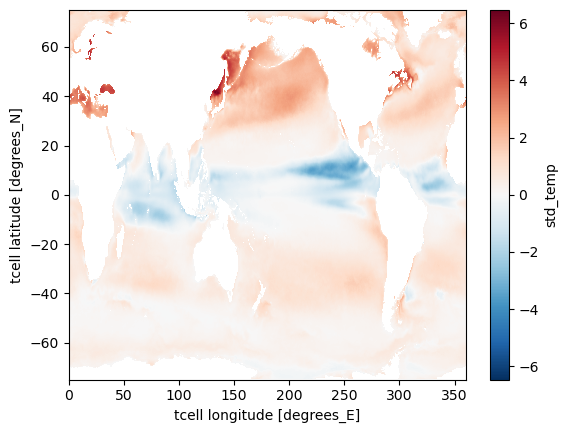

In [55]:
(dSTATS.std_temp.isel(st_ocean=0)-dSTATS.std_temp.isel(st_ocean=10)).plot()

# The End

In [ ]:
#client.shutdown()

# An appendix of some `regionmask` basics

In [14]:
import regionmask

regionmask.__version__

'0.11.0'

In [25]:
# don't expand data
xr.set_options(display_style="text", display_expand_data=False, display_width=60)
xr.set_options(display_style='html', display_expand_data=True, display_width=120)

In [16]:
lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

In [26]:
regionmask.defined_regions.srex

<regionmask.Regions 'SREX'>
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...
overlap:  False

Regions:
 1 ALA       Alaska/N.W. Canada
 2 CGI     Canada/Greenl./Icel.
 3 WNA         W. North America
 4 CNA         C. North America
 5 ENA         E. North America
..  ..                      ...
22 EAS                  E. Asia
23 SAS                  S. Asia
24 SEA                S.E. Asia
25 NAU             N. Australia
26 SAU S. Australia/New Zealand

[26 regions]

In [18]:
mask = regionmask.defined_regions.srex.mask_3D(lon, lat)
mask

<xarray.DataArray 'mask' (region: 26, lat: 180, lon: 360)> Size: 2MB
False False False False False ... False False False False
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 ... 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
  * region   (region) int64 208B 1 2 3 4 5 ... 23 24 25 26
    abbrevs  (region) <U3 312B 'ALA' 'CGI' ... 'NAU' 'SAU'
    names    (region) <U24 2kB 'Alaska/N.W. Canada' ... '...
Attributes:
    standard_name:  region

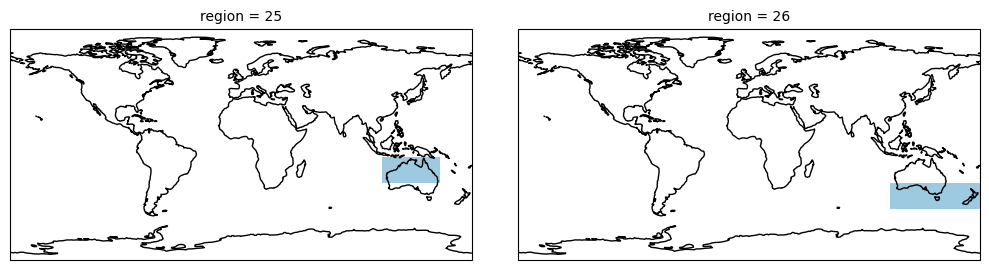

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colors as mplc

cmap1 = mplc.ListedColormap(["none", "#9ecae1"])

fg = mask.isel(region=slice(24,26)).plot(
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    col="region",
    col_wrap=2,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    aspect=1.5,
    cmap=cmap1,
)

for ax in fg.axes.flatten():
    ax.coastlines()

fg.fig.subplots_adjust(hspace=0, wspace=0.1);

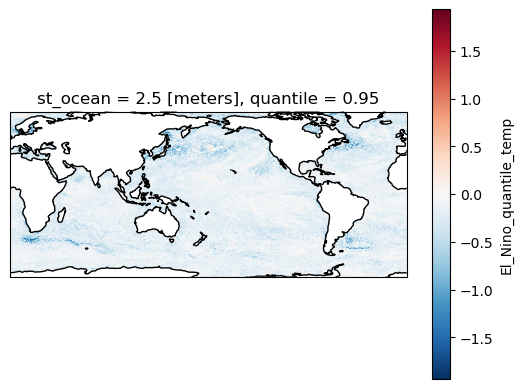

In [20]:
proj = ccrs.PlateCarree(central_longitude=180)

ax = plt.subplot(111, projection=proj)

diffQUANT.El_Nino_quantile_temp.isel(st_ocean = 0).isel(quantile=1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines();

In [27]:
mask_3D = regionmask.defined_regions.srex.mask_3D(diffQUANT)
mask_3D

<xarray.DataArray 'mask' (region: 26, yt_ocean: 1500, xt_ocean: 3600)> Size: 140MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 12kB -74.95 -74.85 -74.75 -74.65 -74.55 -74.45 ... 74.45 74.55 74.65 74.75 74.85 74.95
  * xt_ocean  (xt_ocean) float64 29kB 0.05 0.15 0.25 0.35 0.45 0.55 0.65 ... 359.4 359.5 359.5 359.6 359.8 359.9 360.0
  * region    (region) int64 208B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
    abbrevs   (region) <U3 312B 'ALA' 'CGI' 'WNA' 'CNA' 'ENA' 'CAM' 'AMZ' ... 'CAS' 'TIB' 'EAS' 'SAS' 'SEA' 'NAU' 'SAU'
    names     (region) <U24 2kB 'Alaska/N.W. Canada' 'Canada/Greenl./Icel.' ... 'S. Australia/New Zealand'
Attributes:
    standard_name:  region

In [29]:
region_mask = mask_3D.isel(region=25)

In [30]:
region_data = diffQUANT.where(region_mask)

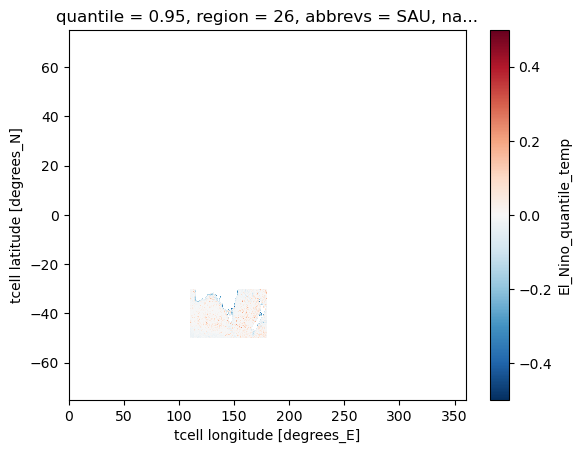

In [34]:
region_data.El_Nino_quantile_temp.isel(quantile=1).max('st_ocean').plot()

/g/data/es60/users/thomas_moore/miniconda3/envs/pangeo_regionmask/lib/python3.12/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


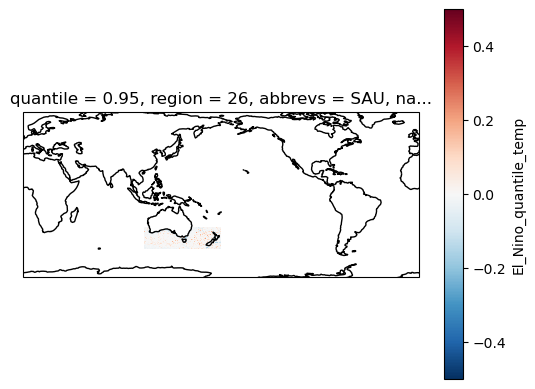

In [39]:
proj = ccrs.PlateCarree(central_longitude=180)

ax = plt.subplot(111, projection=proj)

region_data.El_Nino_quantile_temp.isel(quantile=1).max('st_ocean').plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines();

In [46]:
weights = np.cos(np.deg2rad(region_data.yt_ocean))

regional_avg = region_data.weighted(mask_3D * weights).mean(dim=('xt_ocean', 'yt_ocean')).max('st_ocean')

In [47]:
regional_avg

<xarray.Dataset> Size: 2kB
Dimensions:                (quantile: 2, region: 26)
Coordinates:
  * quantile               (quantile) float64 16B 0.05 0.95
  * region                 (region) int64 208B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
    abbrevs                <U3 12B 'SAU'
    names                  <U24 96B 'S. Australia/New Zealand'
Data variables:
    quantile_temp          (quantile, region) float64 416B dask.array<chunksize=(2, 26), meta=np.ndarray>
    El_Nino_quantile_temp  (quantile, region) float64 416B dask.array<chunksize=(2, 26), meta=np.ndarray>
    La_Nina_quantile_temp  (quantile, region) float64 416B dask.array<chunksize=(2, 26), meta=np.ndarray>

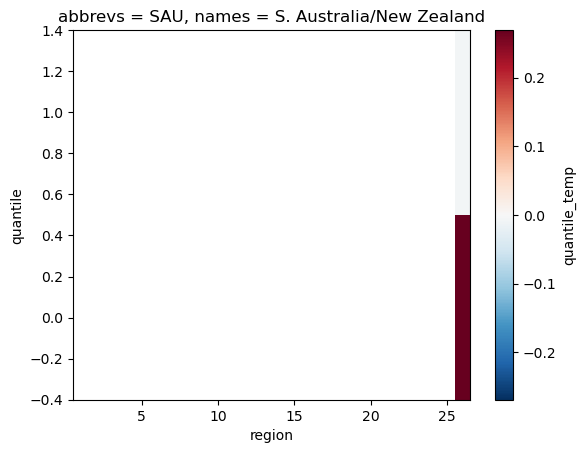

In [49]:
regional_avg.quantile_temp.plot()